# Notes on Aritro's Simulations

The following program is an n-body simulation which simulates the orbits of planets by plotting their positions
on a scatterplot


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Particle import Particle

plt.ion()

In [4]:
def runsim(bodies, nsteps, tstep):
    XPosArr = np.full((len(bodies),nsteps), np.nan)
    YPosArr = np.full((len(bodies),nsteps), np.nan)
    
    #XPosArr = (Planet1XPos, StarXPos)
    #YPosArr = (Planet1YPos, StarYPos)
    
    # The following for-loop is the simulation process itself. The objects involved first exert forces on one another
    # and then update their velocities and positions based on those forces and their masses. Then, the positions are recorded
    # in the arrays for each object to be plotted.
    for steps in range(nsteps):
        for i in range(len(bodies)):
            for j in range(len(bodies)):
                if i!=j:
                    bodies[i].getForce(bodies[j])
                    bodies[j].getForce(bodies[i])
            bodies[i].update(tstep)
        for l in range(len(bodies)):
            bodies[l].resetForce()
            XPosArr[l][steps] = bodies[l].x
            YPosArr[l][steps] = bodies[l].y

    return (XPosArr, YPosArr)

def plotter(XPosArr, YPosArr):
    plt.figure(figsize=(55,55))
    
    for ind in range(XPosArr.shape[0]):
        if ind == 0:
            plt.plot(XPosArr[ind,:]/150e9, YPosArr[ind,:]/150e9, "o", label='star', color = "yellow")
        else:
            plt.plot(XPosArr[ind,:]/150e9, YPosArr[ind,:]/150e9, "-o", label='planet %d'%ind)#, color = "blue")

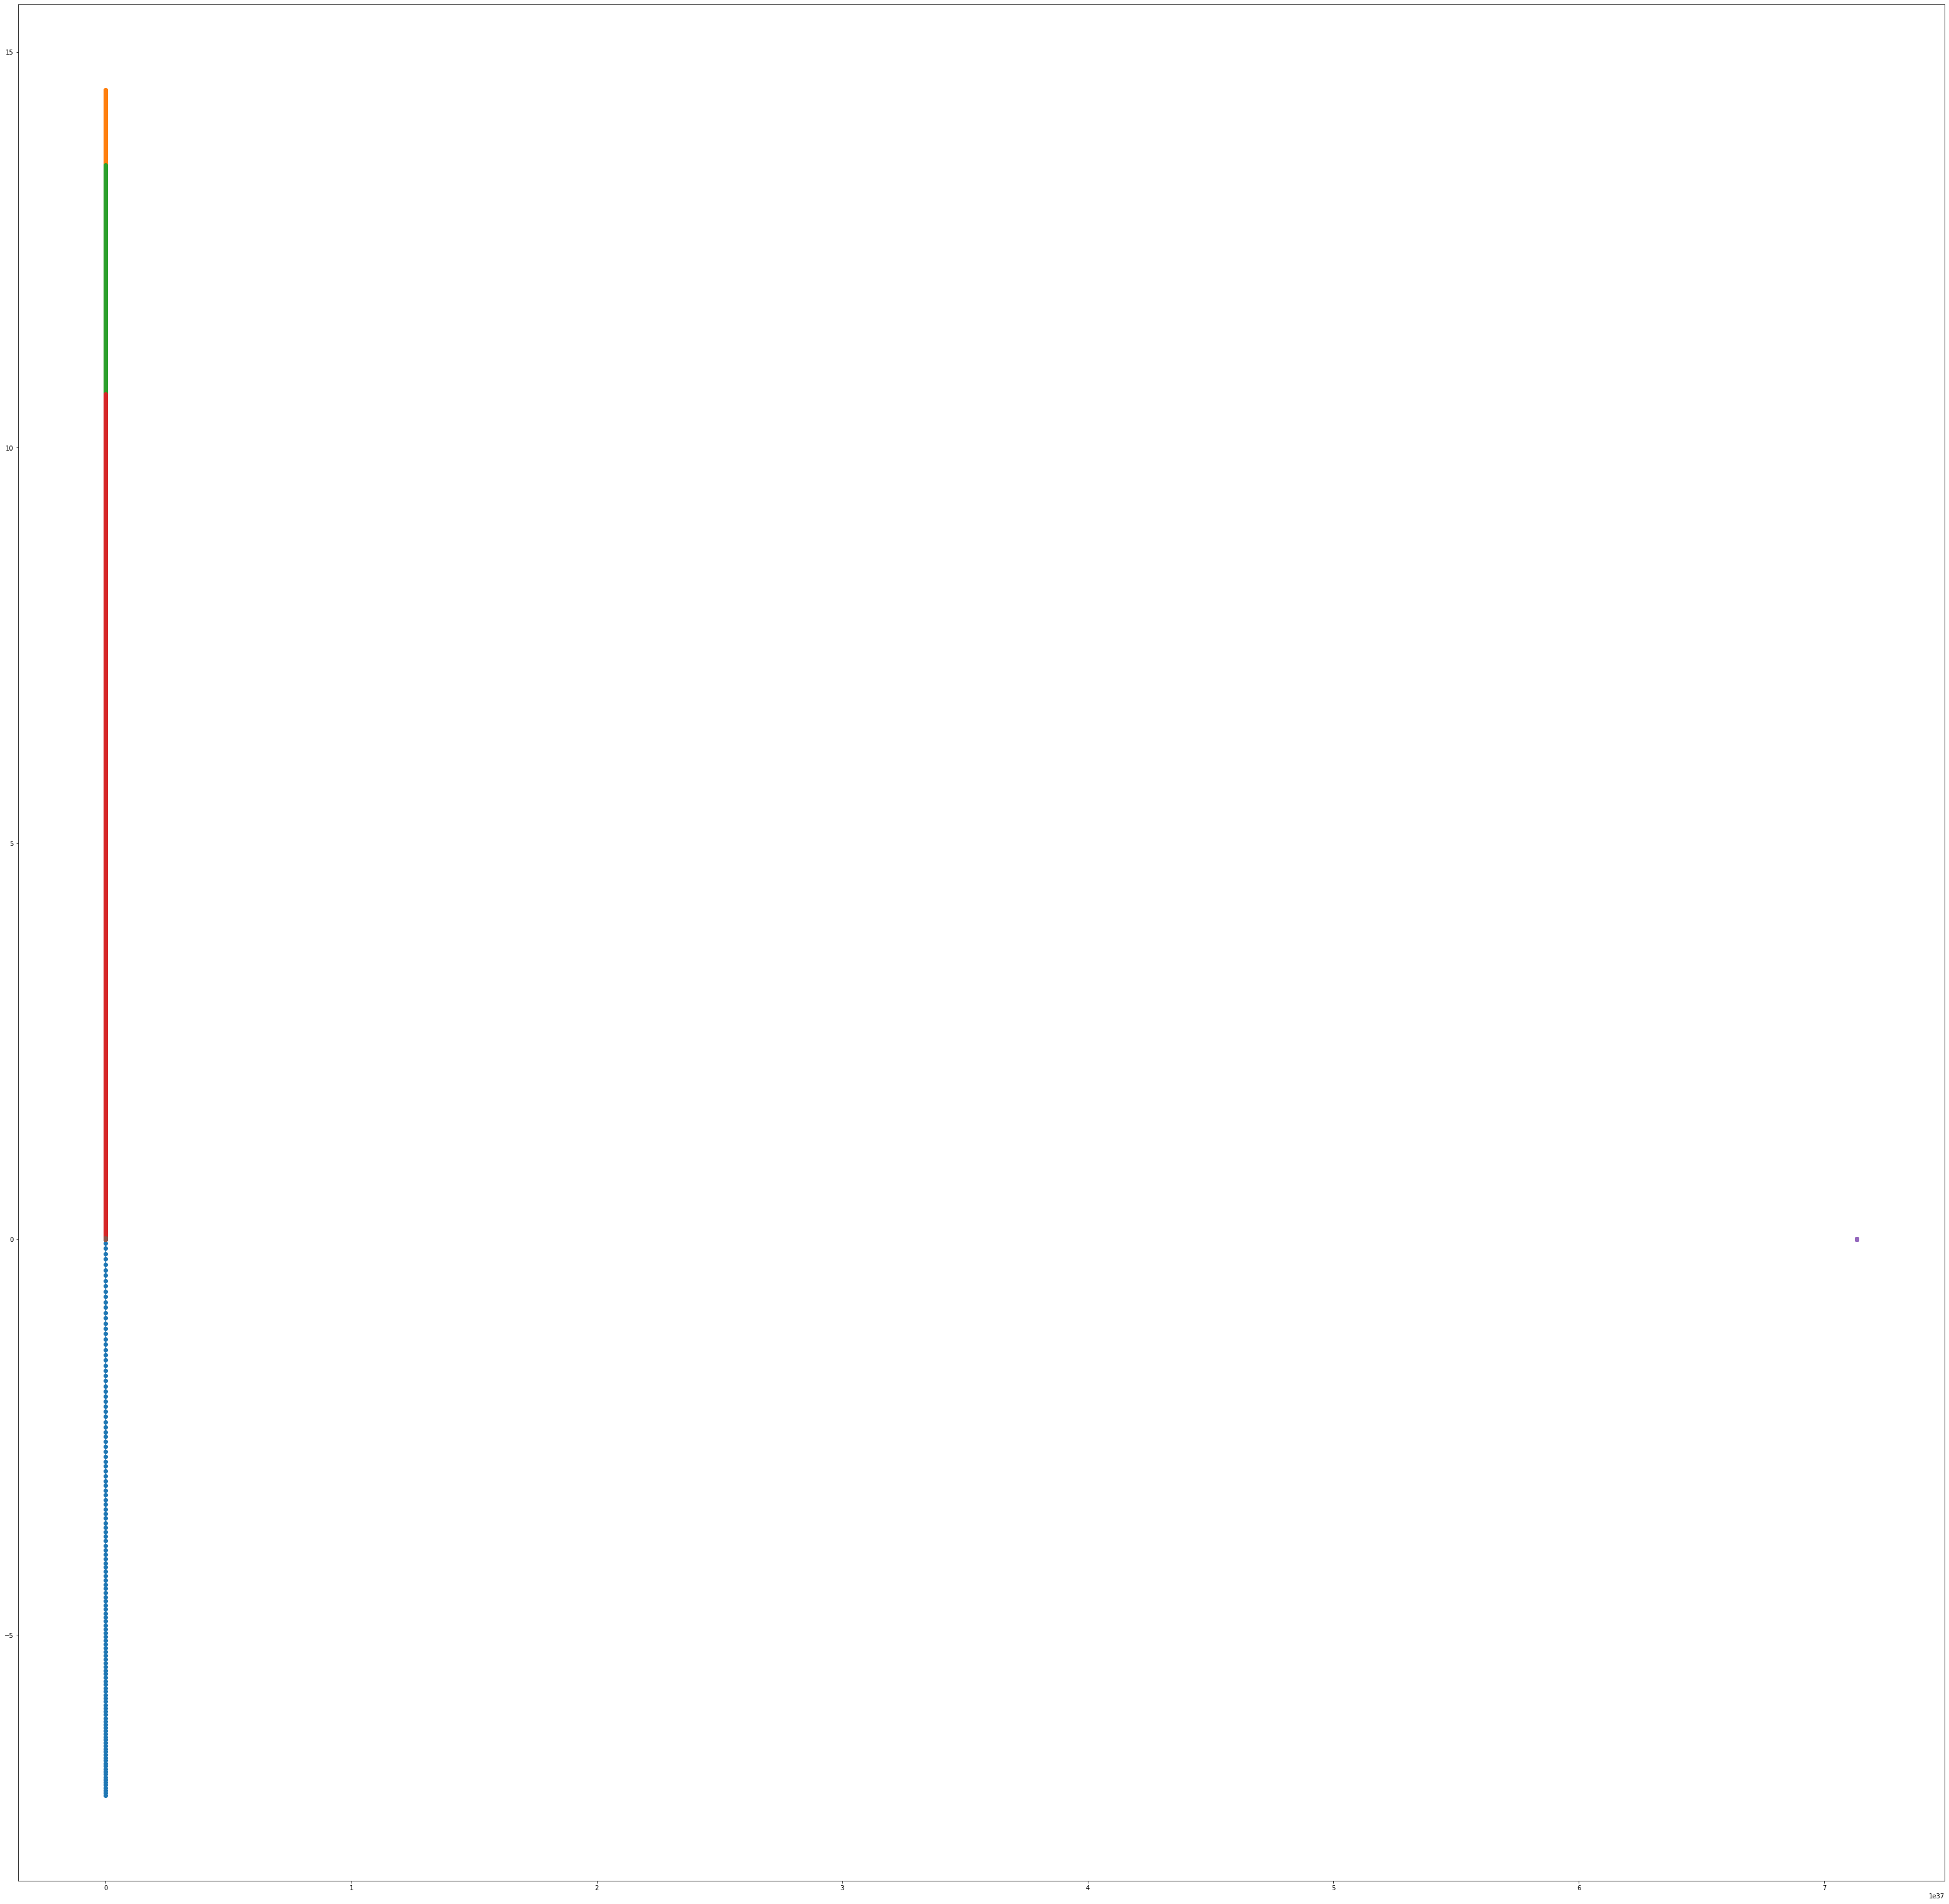

In [7]:
# Initializes instances of a Particle. These particles have fields pertaining to their mass, x-position, y-position,
# x-velocity, and y-velocity. 

HR_8799 = Particle(1.9885e30*1.47, 0, 0, 0, 0)
HR_8799_e = Particle(1.8982e27*7.4, 2.43097e+12, 0, 0, 8957.6116)
HR_8799_d = Particle(1.8982e27*9.1, 3.98978e+12, 0, 0 , 6992.0987)
HR_8799_c = Particle(1.8982e27*7.8, 6.19186e+12, 0, 0, 5612.695)
HR_8799_b = Particle(1.8982e27*5.7, 1.0711e+13, 0, 0, 4267.436)
hello = Particle(0.01, 1.07e49, 1, 1, 1)
yee = Particle(4,5e38,5,5,5)

bodies = [HR_8799, HR_8799_e, HR_8799_d, HR_8799_c, HR_8799_b, hello, yee]


#nsteps represents the number of points plotted for each planet in the simulation
trun = 3.78e8
tstep = trun/(1e3)
 #tstep is the time step between points on the scatterplot. Essentially, between each point on the plot, the number
# of seconds that have elapsed is equal to the numerical value of tstep
nsteps = int(trun/tstep)


XPosArr, YPosArr = runsim(bodies, nsteps, tstep)

plotter(XPosArr, YPosArr)